In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [74]:
data = pd.read_csv('./heart.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [75]:
data.shape

(299, 13)

In [76]:
target_col='DEATH_EVENT'

In [77]:
X = data.drop(target_col, axis=1)
Y = data[[target_col]]

In [78]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [79]:
Y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [80]:
def NameClass(row):
    if row == 1:
        return "Dead"
    return "Alive"

In [81]:
Y_string_names = Y['DEATH_EVENT'].apply(NameClass)
Y_string_names

0       Dead
1       Dead
2       Dead
3       Dead
4       Dead
       ...  
294    Alive
295    Alive
296    Alive
297    Alive
298    Alive
Name: DEATH_EVENT, Length: 299, dtype: object

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [83]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (239, 12)
X_test: (60, 12)
Y_train: (239, 1)
Y_test: (60, 1)


In [84]:
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

LogisticRegression()

In [85]:
print(recall_score(Y_test, LogReg.predict(X_test)))
print(precision_score(Y_test, LogReg.predict(X_test)))

0.391304347826087
0.8181818181818182


In [86]:
SVCmodel = SVC(kernel='rbf')
SVCmodel.fit(X_train, Y_train)

SVC()

In [87]:
print(recall_score(Y_test, SVCmodel.predict(X_test)))
print(precision_score(Y_test, SVCmodel.predict(X_test)))

0.0
0.0


In [88]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [89]:
print(recall_score(Y_test, DT.predict(X_test)))
print(precision_score(Y_test, DT.predict(X_test)))

0.6521739130434783
0.7142857142857143


In [90]:
list(zip(X.columns.values, DT.feature_importances_))

[('age', 0.06690357371551126),
 ('anaemia', 0.014792044891896353),
 ('creatinine_phosphokinase', 0.03941942380567955),
 ('diabetes', 0.0),
 ('ejection_fraction', 0.1496123669294079),
 ('high_blood_pressure', 0.0),
 ('platelets', 0.03287121087088078),
 ('serum_creatinine', 0.11555054881555432),
 ('serum_sodium', 0.07728820065685528),
 ('sex', 0.027693694140302493),
 ('smoking', 0.0),
 ('time', 0.475868936173912)]

In [91]:
sum(DT.feature_importances_)

1.0

In [92]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

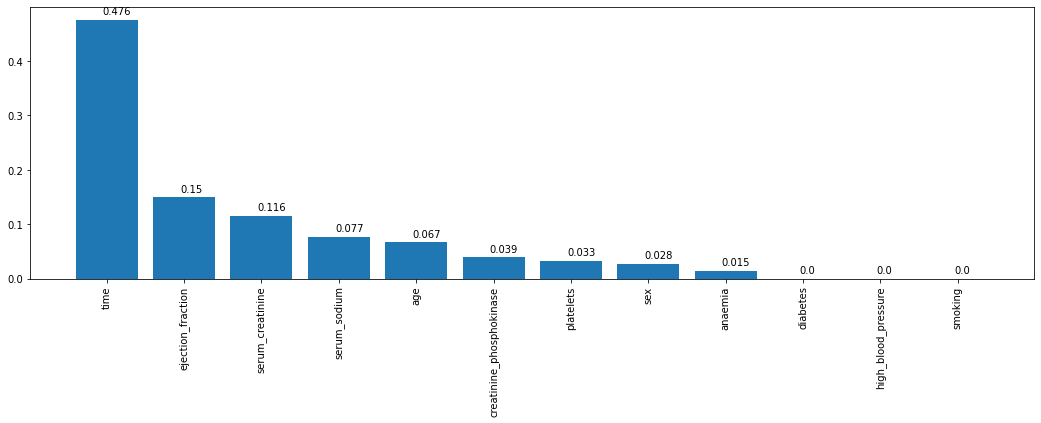

In [93]:
DTLabelsSort, DTValuesSort = draw_feature_importances(DT, X)

[Text(0.5, 0.875, 'time <= 73.5\ngini = 0.424\nsamples = 239\nvalue = [166, 73]\nclass = Dead'),
 Text(0.25, 0.625, 'serum_sodium <= 136.5\ngini = 0.299\nsamples = 60\nvalue = [11, 49]\nclass = Alive'),
 Text(0.125, 0.375, 'ejection_fraction <= 57.5\ngini = 0.121\nsamples = 31\nvalue = [2, 29]\nclass = Alive'),
 Text(0.0625, 0.125, 'gini = 0.064\nsamples = 30\nvalue = [1, 29]\nclass = Alive'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Dead'),
 Text(0.375, 0.375, 'serum_sodium <= 139.5\ngini = 0.428\nsamples = 29\nvalue = [9, 20]\nclass = Alive'),
 Text(0.3125, 0.125, 'gini = 0.498\nsamples = 17\nvalue = [8, 9]\nclass = Alive'),
 Text(0.4375, 0.125, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]\nclass = Alive'),
 Text(0.75, 0.625, 'serum_creatinine <= 1.45\ngini = 0.232\nsamples = 179\nvalue = [155, 24]\nclass = Dead'),
 Text(0.625, 0.375, 'age <= 79.0\ngini = 0.129\nsamples = 144\nvalue = [134, 10]\nclass = Dead'),
 Text(0.5625, 0.125, 'gini = 0.098\nsamples

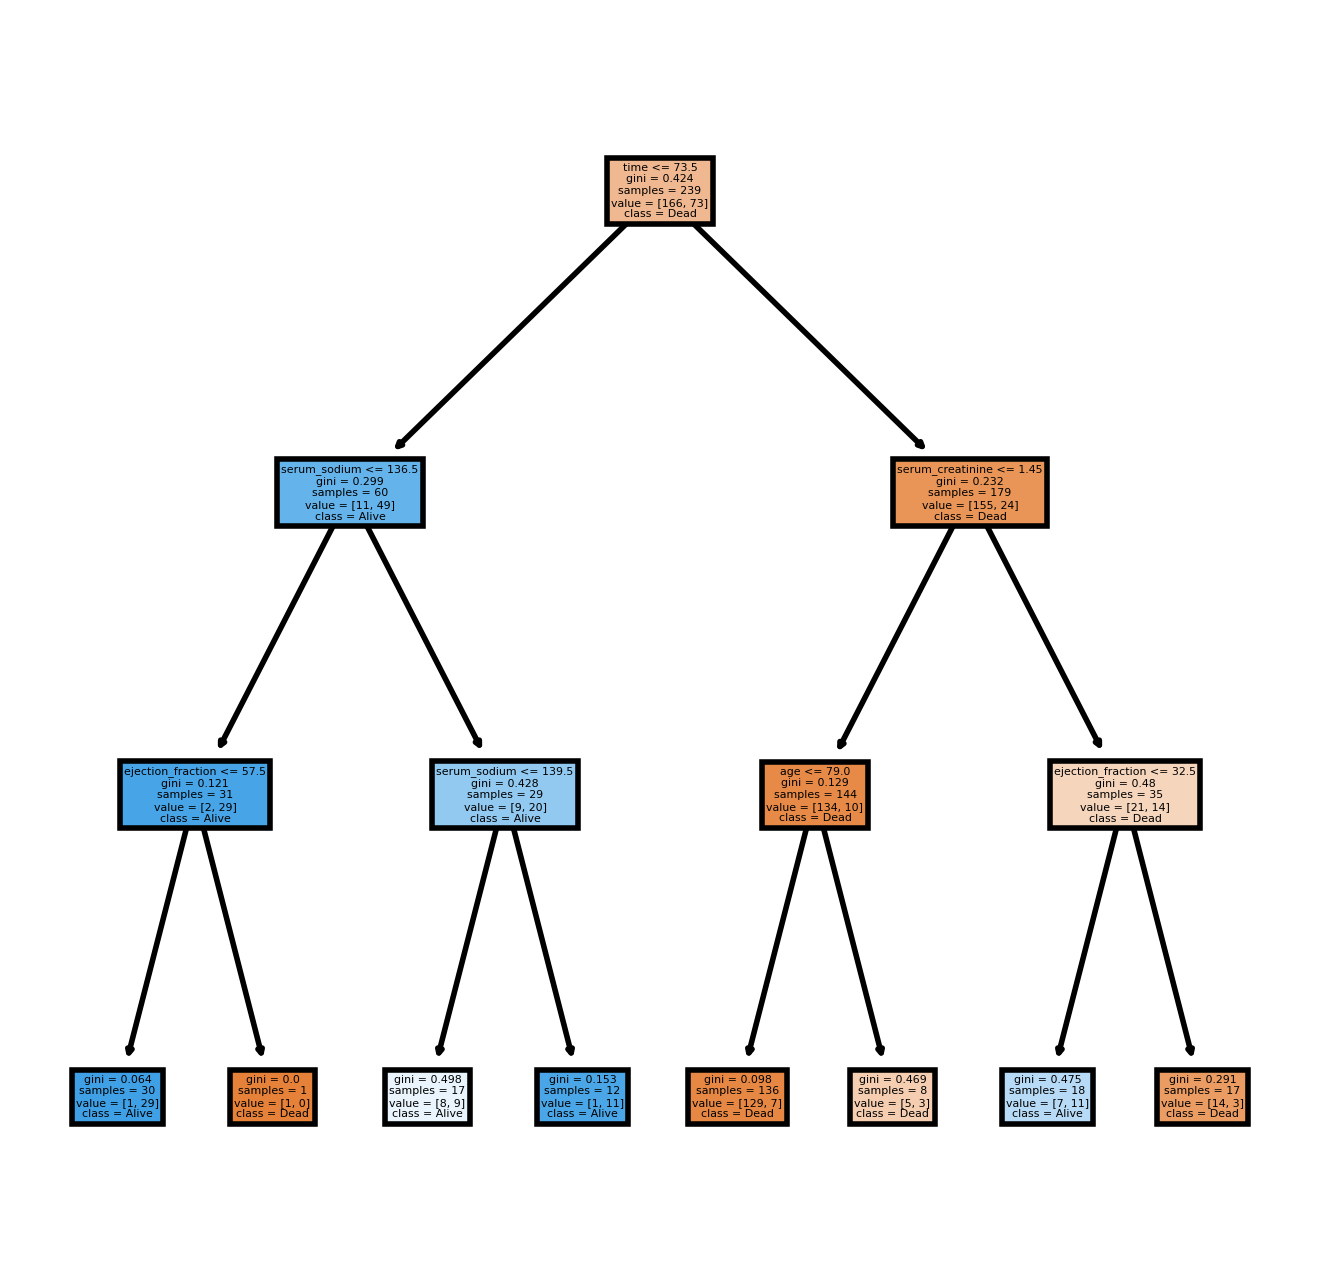

In [94]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 1)
clf.fit(X_train, Y_train)
tree.plot_tree(clf, filled = True,feature_names = X.columns.values, class_names = Y_string_names.unique())